In [27]:
!pip install tensorflow opencv-python matplotlib scikit-learn

# Step 2: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from google.colab import drive

In [4]:
import numpy as np
from collections import Counter
import tensorflow_datasets as tfds  # Import TensorFlow Datasets
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
# Load the Cassava dataset using TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'cassava',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,  # This will return (image, label) pairs
    with_info=True,
)

In [7]:
# Convert the TensorFlow Datasets to NumPy arrays
X_train, y_train = [], []
for image, label in tfds.as_numpy(ds_train):
    image = tf.image.resize(image, [224, 224]).numpy()
    X_train.append(image)
    y_train.append(label)

X_test, y_test = [], []
for image, label in tfds.as_numpy(ds_test):
    image = tf.image.resize(image, [224, 224]).numpy()
    X_test.append(image)
    y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
# Listing the class labels for the data
classes = ["Cassava Bacterial Blight (CBB)","Cassava Brown Streak Disease (CBSD)","Cassava Green Mottle (CGM)","Cassava Mosaic Disease (CMD)","Healthy"]

selected_classes = [0,1,2,3,4]

In [9]:
# Data Augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)


test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Load training and test data
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32,
)

test_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=32,
)

In [11]:
# Calculate the number of samples manually
train_samples = X_train.shape[0]
test_samples = X_test.shape[0]


In [14]:
# Build the Model

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the top layers of ResNet50
for layer in base_model.layers[-10:]: # Unfreeze the last 10 layers
     layer.trainable = True

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Custom dense layer

# number of classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

output = Dense(num_classes, activation='softmax')(x)

# final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
 model.compile(optimizer=Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Number of classes: 5


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


176/176 ━━━━━━━━━━━━━━━━━━━━ 177s 642ms/step - accuracy: 0.5249 - loss: 1.4199 - val_accuracy: 0.1320 - val_loss: 5.4672
Epoch 2/10
  1/176 ━━━━━━━━━━━━━━━━━━━━ 48s 275ms/step - accuracy: 0.5938 - loss: 1.1955

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5938 - loss: 1.1955 - val_accuracy: 0.1724 - val_loss: 5.9123
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 135s 473ms/step - accuracy: 0.6637 - loss: 0.8911 - val_accuracy: 0.2117 - val_loss: 5.0756
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6250 - loss: 1.2222 - val_accuracy: 0.2414 - val_loss: 4.5230
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 85s 471ms/step - accuracy: 0.7184 - loss: 0.7583 - val_accuracy: 0.0954 - val_loss: 2.8090
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6562 - loss: 0.9343 - val_accuracy: 0.0690 - val_loss: 2.8115
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 86s 468ms/step - accuracy: 0.7490 - loss: 0.6762 - val_accuracy: 0.2732 - val_loss: 1.9666
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.8125 - loss: 0.5841 - val_accuracy: 0.5517 - val_loss: 1.3269
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 86s 474ms/step - accuracy: 0.7748 - loss: 0.6191 - val_accu

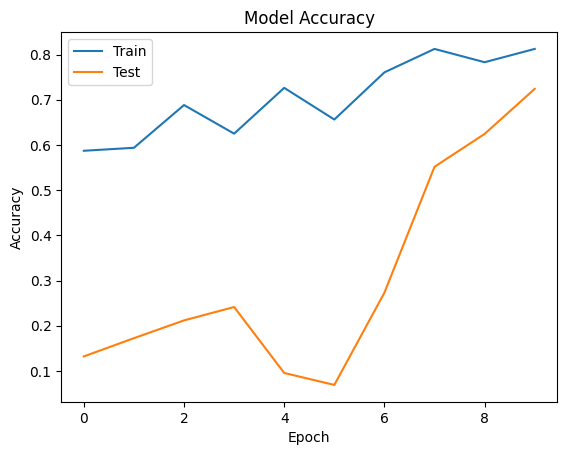

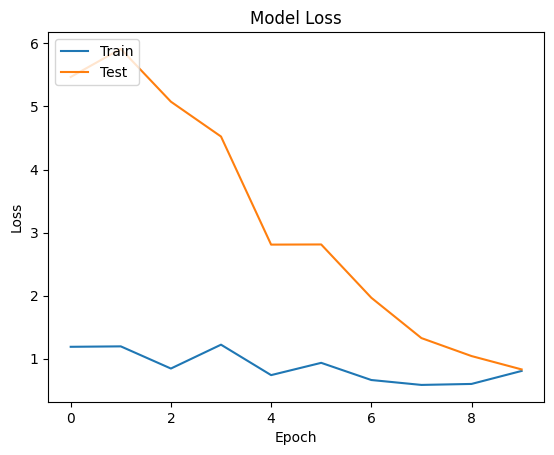

In [15]:
# Train the Model

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=train_samples // train_generator.batch_size,
    validation_steps=test_samples // test_generator.batch_size
)

#  Evaluate the Model

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#Save the Model

model.save('/content/drive/MyDrive/cassava_leaf_disease_classifier.h5')

from google.colab import files
 files.download('/content/drive/MyDrive/cassava_leaf_disease_classifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OUTPUTS FOR ALL TYPE OF DISEASES MENTIONED ABOVE AND HEALTHY CATEGORY

In [25]:
# Make Predictions with the Model

from tensorflow.keras.preprocessing import image

# Load and preprocess the image for prediction
img_path = '/content/assava_CMD1.jpeg'  # Given test image belongs to CMD class image likn(https://apps.lucidcentral.org/pppw_v11/images/entities/cassava_mosaic_diseases_520/eacmv_stephan2.jpg)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(prediction)

class_labels = ["Cassava Bacterial Blight (CBB)", "Cassava Brown Streak Disease (CBSD)", "Cassava Green Mottle (CGM)", "Cassava Mosaic Disease (CMD)", "Healthy"]

predicted_label = class_labels[predicted_class]

print(f'Predicted Class: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class: Cassava Mosaic Disease (CMD)


In [22]:
# Make Predictions with the Model

from tensorflow.keras.preprocessing import image

# Load and preprocess the image for prediction
img_path = '/content/cassava_CBSD.jpg'  #  Given test image belongs to CBSD class image link(https://apps.lucidcentral.org/pppw_v12/images/entities/cassava_brown_streak_disease_439/dsc03920.jpg)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(prediction)

class_labels = ["Cassava Bacterial Blight (CBB)", "Cassava Brown Streak Disease (CBSD)", "Cassava Green Mottle (CGM)", "Cassava Mosaic Disease (CMD)", "Healthy"]

predicted_label = class_labels[predicted_class]

print(f'Predicted Class: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: Cassava Brown Streak Disease (CBSD)


In [23]:
# Make Predictions with the Model

from tensorflow.keras.preprocessing import image

# Load and preprocess the image for prediction
img_path = '/content/cassva healthy.jpg'  #  Given test image belongs to Healthy class image link(https://www.frontiersin.org/files/Articles/293051/fpls-08-01852-HTML/image_m/fpls-08-01852-g001.jpg)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(prediction)

class_labels = ["Cassava Bacterial Blight (CBB)", "Cassava Brown Streak Disease (CBSD)", "Cassava Green Mottle (CGM)", "Cassava Mosaic Disease (CMD)", "Healthy"]

predicted_label = class_labels[predicted_class]

print(f'Predicted Class: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: Healthy


In [24]:
# Make Predictions with the Model

from tensorflow.keras.preprocessing import image

# Load and preprocess the image for prediction
img_path = '/content/cassava_bacteria;_bright.jpg'  #  Given test image belongs to CBB class image link(https://apps.lucidcentral.org/pppw_v10/images/entities/cassava_bacterial_blight_173/cassavabb.jpg)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(prediction)

class_labels = ["Cassava Bacterial Blight (CBB)", "Cassava Brown Streak Disease (CBSD)", "Cassava Green Mottle (CGM)", "Cassava Mosaic Disease (CMD)", "Healthy"]

predicted_label = class_labels[predicted_class]

print(f'Predicted Class: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: Cassava Brown Streak Disease (CBSD)


In [26]:
# Make Predictions with the Model

from tensorflow.keras.preprocessing import image

# Load and preprocess the image for prediction
img_path = '/content/cassava_Green_Mottel_CGM.jpg'  #  Given test image belongs to CGM class image link(https://www.researchgate.net/profile/Emile-Frison/publication/281633837/figure/fig5/AS:670701958742041@1536919216637/Cassava-vein-mosaic-virus-causing-vein-mosaic-and-leaf-curling-on-cassava-Dr-LA_Q320.jpg)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(prediction)

class_labels = ["Cassava Bacterial Blight (CBB)", "Cassava Brown Streak Disease (CBSD)", "Cassava Green Mottle (CGM)", "Cassava Mosaic Disease (CMD)", "Healthy"]

predicted_label = class_labels[predicted_class]

print(f'Predicted Class: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: Cassava Green Mottle (CGM)
